In [1]:
from __future__ import print_function

In [10]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
% matplotlib inline

In [13]:
data = pd.read_csv('nasa_u1_v19.csv')
data = data.x
data = (data-data.mean())/data.std()

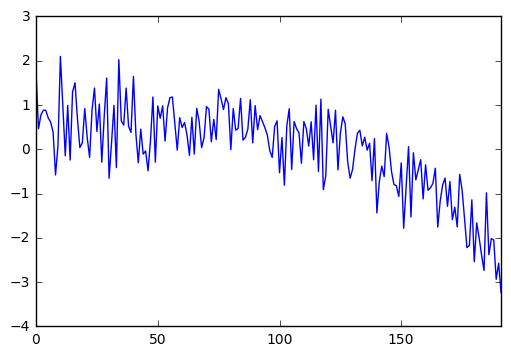

In [14]:
data.plot()

In [274]:
############################################################################################
###
###   test two variables model
###
############################################################################################

In [264]:
A = np.array([[-0.1,2],[-2,-0.1]])
A

array([[-0.1,  2. ],
       [-2. , -0.1]])

In [347]:
dt = 0.1
t = np.arange(0,26,dt)
x0 = np.array([2,0])
print(len(t))
print(x0)

260
[2 0]


In [266]:
def test_func(x,t,A):
    B = A.reshape(2,len(A)/2)
    return np.dot(B,x)
res = odeint(test_func,x0,t,args=(tuple(A.reshape(1,4))))

/home/happyling/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


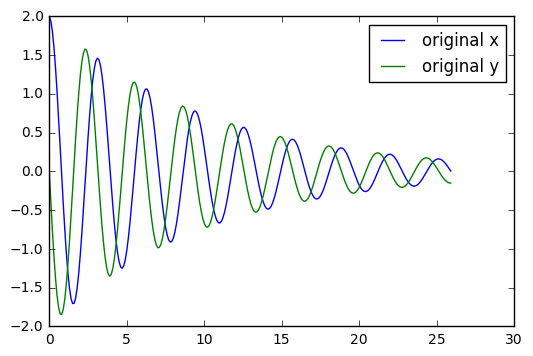

In [279]:
plt.plot(t,res[:,0],label='original x')
plt.plot(t,res[:,1],label='original y')
plt.legend()

In [359]:
dx = np.gradient(res[:,0],dt)
dy = np.gradient(res[:,1],dt)

In [352]:
import numpy as np
import ffx

lag = 200
train_X = res[1:(len(res)-lag),:]
train_dxdt = dx[1:(len(res)-lag)]

test_X = res[(len(res)-lag)::]
test_dxdt = dx[(len(res)-lag)::]
varnames = ["x", "y"]

def run_ffx(train_X, train_y, test_X, test_y, varnames):
    models = ffx.run(train_X, train_y, test_X, test_y, varnames)
    base = [model.numBases() for model in models]
    test_error = [model.test_nmse for model in models]
    train_error = [ffx.core.nmse(model.simulate(train_X), train_y, min(train_y), max(train_y)) 
                   for model in models]
    for model,test_err,train_err in zip(models,test_error,train_error):
        print(model,"  ",model.numBases(),"  ",test_err,"   ",train_err)
        
    return ([base, test_error], [base, train_error], models)

In [353]:
dxdt_fitted_result = run_ffx(train_X,train_dxdt,test_X,test_dxdt,varnames)
print("------------------------------------")

dydt_fitted_result = run_ffx(train_X,train_dydt,test_X,test_dydt,varnames)

/home/happyling/anaconda3/lib/python3.5/site-packages/ffx/core.py:865: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  st, fin, num=ss.numAlphas() * 10)[::-1][:ss.numAlphas() / 4]


-0.188    0    0.11147349239013991     0.318615294880877
-0.00302 + 1.89*y    1    0.007807429055822468     0.022436753303960534
-0.00130 + 1.94*y - 0.0555*x    2    0.00357392125575388     0.010311647833870887
------------------------------------
0.148    0    0.11191509593219628     0.29015256611233153
0.0170 - 1.88*x    1    0.008094597014281042     0.020718668424244642
0.00819 - 1.94*x - 0.0507*y    2    0.0037292999919661778     0.009525201808684974


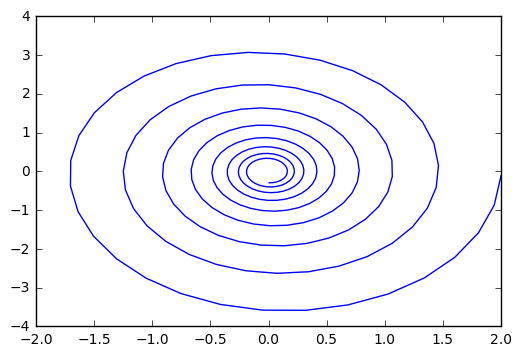

In [354]:
plt.plot(res[:,0],-0.00130 + 1.94*res[:,1] - 0.0555*res[:,0])

In [355]:
def pre_func(state,t):
    x,y = state
    dxdt = -0.00130 + 1.94*y - 0.0555*x
    dydt = 0.00819 - 1.94*x - 0.0507*y
    return (dxdt,dydt)
pre_result = odeint(pre_func,x0,t)

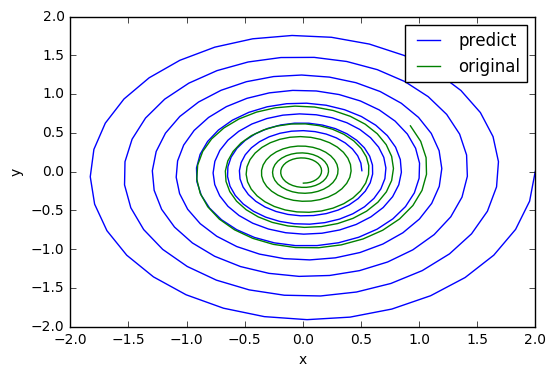

In [356]:
plt.plot(pre_result[:,0],pre_result[:,1],label="predict")
plt.plot(test_X[:,0],test_X[:,1],label="original")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

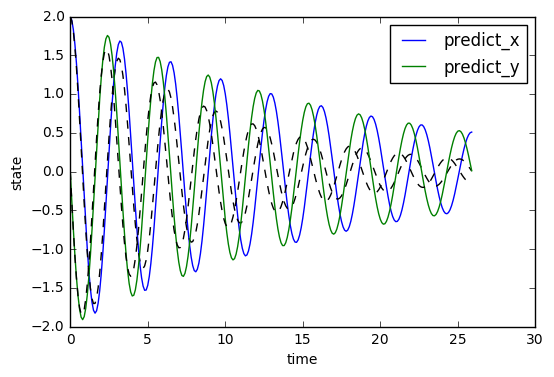

In [357]:
plt.plot(t,pre_result[:,0],label='predict_x')
plt.plot(t,res[:,0],'k--')
plt.plot(t,pre_result[:,1],label='predict_y')
plt.plot(t,res[:,1],'k--')
plt.legend()
plt.xlabel('time')
plt.ylabel('state')